# Data cleaning


In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from path import Path

In [2]:
# Loading data
file_path = Path("Resources/Health_systems.csv")
og_df = pd.read_csv(file_path)
og_df.head(10)

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
5,Antigua and Barbuda,NaN,Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,NaN,79.0
6,Argentina,NaN,Argentina,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0,100.0
7,Armenia,NaN,Armenia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,76.0
8,Australia,NaN,Australia,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,45.1,100.0,100.0
9,Austria,NaN,Austria,10.4,72.5,18.9,4688.3,5295.2,NaN,5.1,8.2,109.9,100.0,100.0


In [3]:
# Drop columns due to their insignificance for our research and also lack of data
new_df = og_df.drop(columns=['Country_Region', 'Province_State', 'Completeness_of_birth_reg_2009-18', 'Specialist_surgical_per_1000_2008-18'], axis=1)

# Make column names more readable
new_df.rename(
    columns={"Health_exp_pct_GDP_2016": "Health expenditure (% of GDP)",
            "Health_exp_public_pct_2016": "Domestic general government health expenditure (% of health expenditure)",
            "Health_exp_out_of_pocket_pct_2016": "Out-of-pocket expenditure (% of health expenditure)",
            "Health_exp_per_capita_USD_2016": "Health expenditure per capita (current US$)",
            "per_capita_exp_PPP_2016": "Current health expenditure per capita, PPP (current international $)",
            "External_health_exp_pct_2016": "External health expenditure (% of current health expenditure)",
            "Physicians_per_1000_2009-18": "Physicians (per 1,000 people)",
            "Nurse_midwife_per_1000_2009-18": "Nurses and midwives (per 1,000 people)"},
    inplace=True
)

# Set country name as the index
new_df.set_index('World_Bank_Name', inplace=True)

# Drop rows with null values in particular column
new_df.dropna(subset=['Health expenditure (% of GDP)'], inplace=True)

# Fill missing values with 0 for other rows and columns
new_df.fillna(value=0, inplace=True)

# Encode Completeness of death registration column as 0/1 values with 0 for either missing or lower than the threshold of 98% and 1 for value above the threshold,
# we assume this indicates policital transparency of healthcare systems
# threshold was chosen based on distribution of original data
new_df['Transparency'] = new_df['Completeness_of_death_reg_2008-16'] > 98

# Convert boolean array to numerical 
new_df['Transparency'] = new_df['Transparency'].astype(int)

# Drop original column containing scores and null values
new_df.drop('Completeness_of_death_reg_2008-16',axis=1, inplace=True)

In [4]:
# See how data looks at this point
new_df.head(10)

,Health expenditure (% of GDP),Domestic general government health expenditure (% of health expenditure),Out-of-pocket expenditure (% of health expenditure),Health expenditure per capita (current US$),"Current health expenditure per capita, PPP (current international $)",External health expenditure (% of current health expenditure),"Physicians (per 1,000 people)","Nurses and midwives (per 1,000 people)",Transparency
World_Bank_Name,,,,,,,,,
Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0
Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,0
Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,0
Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,0
Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0
Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,0
Argentina,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,1
Armenia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,0
Australia,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,1


In [5]:
# Count nulls in each column
# new_df.isnull().sum()

# Slice rows with null values out of original DataFrame
# df1 = new_df[new_df.isnull().any(axis=1)] 

In [6]:
# Drop index
new_df.reset_index(inplace=True)

# Fetch country names to use later
names = new_df['World_Bank_Name']

# Return index
new_df.set_index('World_Bank_Name', inplace=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

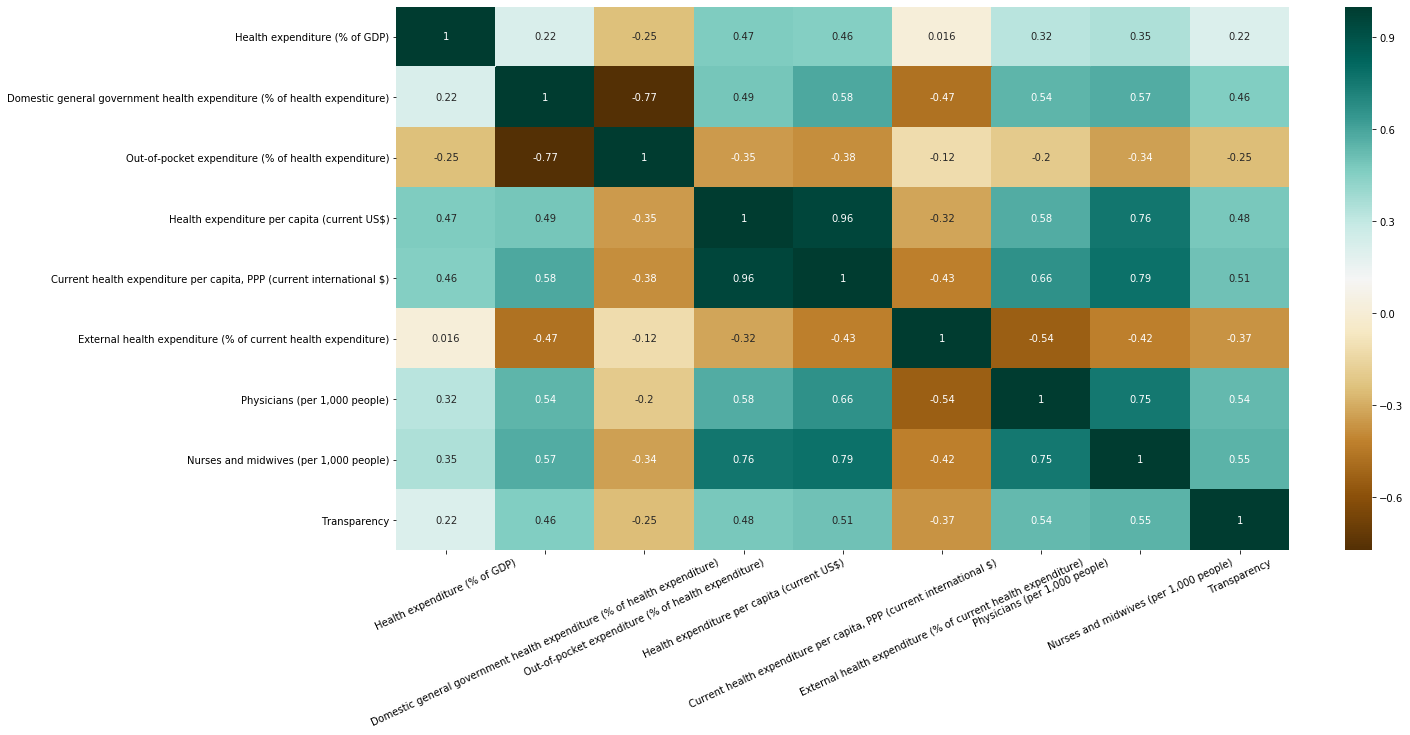

In [7]:
# Finding the relations between the variables in clean Df
plt.figure(figsize=(20,10))
c = new_df.corr()

# Plot heatmap with seaborn
chart = sns.heatmap(c,cmap='BrBG',annot=True)
plt.xticks(
    rotation=25
)

# Data pre-processing

In [8]:
# Create new DF to process and fit to model
df_kmeans = new_df.copy()

In [9]:
# Normalize data with StandardScaler class
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and scale 
df_kmeans_scaled = scaler.fit_transform(df_kmeans)

# Look at the array
print(df_kmeans_scaled)

[[ 1.17396571 -2.1834724   2.29190381 ... -0.8917051  -0.95939257
  -0.63960215]
 [-0.00507113 -0.52583444  1.29805601 ... -0.32065906 -0.1317395
  -0.63960215]
 [-0.03875789  0.67515394 -0.09025716 ...  0.06003829 -0.48286505
  -0.63960215]
 ...
 [-0.37562556 -1.95058111  2.47632917 ... -0.8917051  -0.85907099
  -0.63960215]
 [-0.74618    -0.66739581 -1.0533674  ... -1.01860422 -0.80891019
  -0.63960215]
 [ 0.90447158 -0.29294316 -0.58718106 ... -1.01860422 -0.73366901
  -0.63960215]]


In [10]:
# Compress data using PCA class
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Fit scaled data and compress to three dimensions
df_pca = pca.fit_transform(df_kmeans_scaled)

# Transform PCA output to DF
df_pca_df = pd.DataFrame(
        data=df_pca,
        columns=['PC 1', 'PC 2', 'PC 3']
)

# Add country names to compressed df
df_pca_df.set_index(names, inplace=True)

# Look at the result
print(df_pca_df.head(10),"\n")

# Fetch variance explained by three dimensions
print(f"Explained variance after applying PCA: {pca.explained_variance_ratio_.sum()}")

                         PC 1      PC 2      PC 3
World_Bank_Name                                  
Afghanistan         -2.652804 -0.847302  2.559967
Albania             -1.054727 -1.130642  0.453813
Algeria             -0.250355 -0.065623 -0.730259
Andorra              1.933989 -0.408799  1.840751
Angola              -1.719921 -0.394705 -0.926340
Antigua and Barbuda -0.146371 -0.583937 -0.923318
Argentina            1.614105 -0.026568 -1.025652
Armenia             -0.858484 -2.080860  2.227374
Australia            4.210573 -0.081602  0.815927
Austria              4.374351 -0.077025  0.890883 

Explained variance after applying PCA: 0.8008062501266466


In [11]:
# Use elbow method to find optimal value of k
inertia = []
k = list(range(1, 18))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

# Clustering using K-Means


In [12]:
# Initializing model with K = 4
model_4 = KMeans(
    n_clusters=4, 
    random_state=5
)
# Initializing model with K = 5
model_5 = KMeans(
    n_clusters=5, 
    random_state=5
)

In [13]:
# Fitting model 4 with scaled non-compressed data
model_4.fit(df_kmeans_scaled)

# Get predictions of scaled non-compressed data
predictions_4 = model_4.predict(df_kmeans_scaled)

In [15]:
# Add new clusters column to DF
df_kmeans["Cluster"] = model_4.labels_

In [16]:
# Display entire DataFrame
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#     display(df_kmeans)

# Display only certain cluster
# df_kmeans.loc[df_kmeans['Cluster'] == 1]

In [17]:
# Fitting model 5 with scaled and compressed data
model_5.fit(df_pca)

# Get predictions of scaled and compressed data
predictions_5_pca = model_5.predict(df_pca)

In [18]:
# Add new clusters PCA column to DF 
df_kmeans['Cluster PCA'] = model_5.labels_

In [19]:
# Concat data into single df for visualization 
df_for_vis = pd.concat(
    [df_kmeans, df_pca_df], 
    axis=1, 
    join='inner'
)

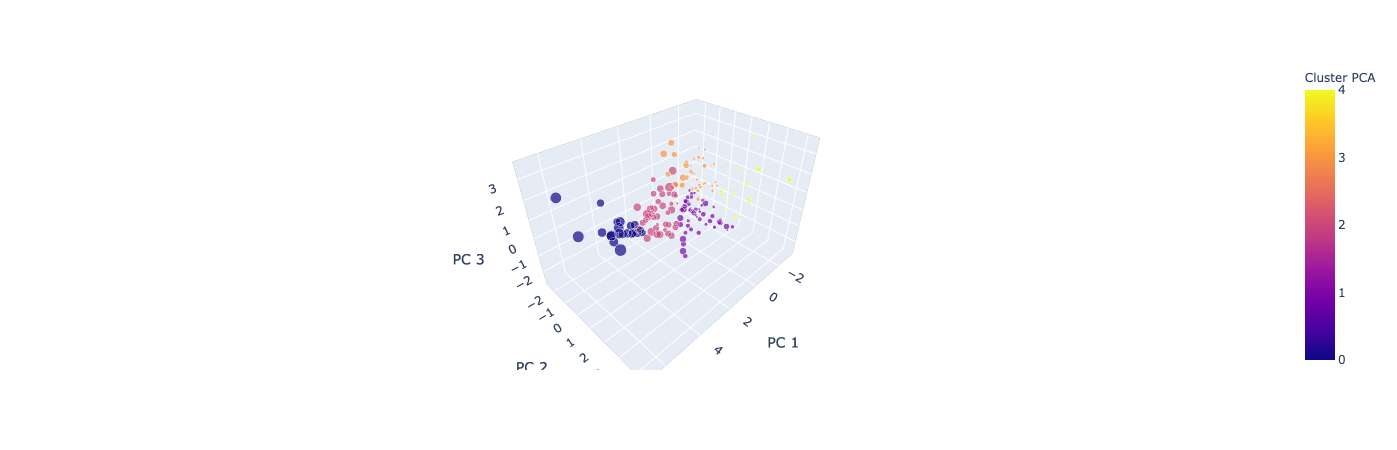

In [20]:
# Create a 3D-Scatter with the PCA data and the clusters
scatter3d = px.scatter_3d(
    df_for_vis,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    width=600,
    color='Cluster PCA',
    hover_name = names,
    size = 'Nurses and midwives (per 1,000 people)'
)

scatter3d.update_layout(legend=dict(x=0, y=1))
scatter3d.show()

## Vis


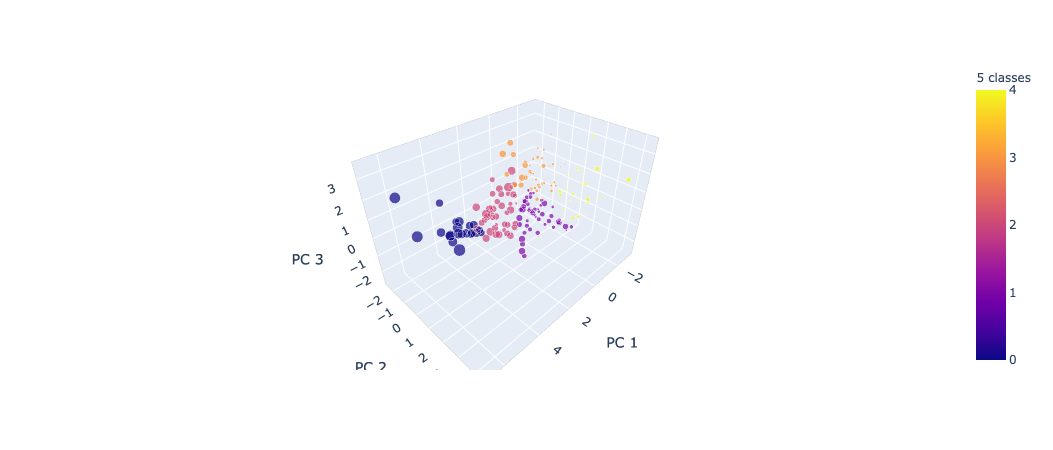